In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy
from estimation_htm import *

%load_ext autoreload
%autoreload 2

# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model.par.full_sample_estimation = True
model.allocate()
model_new = deepcopy(model)



# **Estimating using the full sample** #
(using hazard rates from both before and after the reform)

# Model with reference dependence

In [2]:
est_par = ['gamma', 'lambdaa', 'N', 'cost1', 'cost2', 'type_shares1', 'welfare'] # Parameters to estimate
theta0 = [0.06, 2, 15, 100.0, 300, 0.4, 90/675]  # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0,50), (0.0,model.par.cost2), (model.par.cost1,1000.0), (0.0,1.0), (0.0,model.par.b3)] # Bounds for the parameters

# S: Hvorfor estimerer den ikke N, men accepterer bare initial guess?
# S: Bør vi løse problemet med initial guess ved at trække gættende fra en uniform fordeling som de gør i papiret?

est = method_simulated_moments(model,est_par,theta0,bounds,weight=False)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')

c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\Funcs.py:64: RuntimeWarning: overflow encountered in scalar power
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\hand_to_mouth.py:65: RuntimeWarning: invalid value encountered in scalar add
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])
c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\Funcs.py:65: RuntimeWarning: overflow encountered in scalar power
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)
c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\Funcs.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic P

Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.044
lambdaa                   1.943
N                        15.000
cost1                    94.996
cost2                   386.180
type_shares1              0.047
welfare                   0.133
Objective:               0.2852
Number of iterations:    36


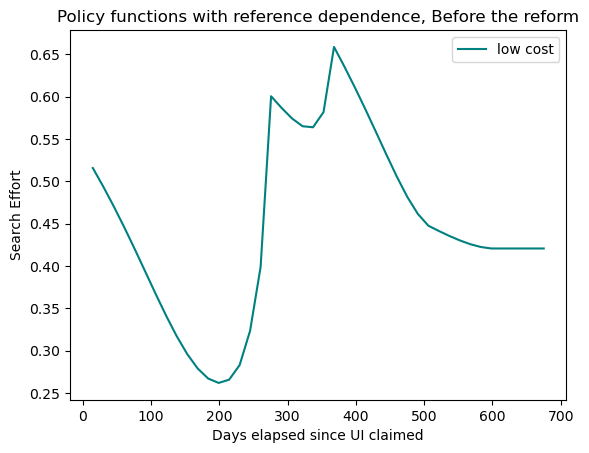

In [3]:
search_effort = solve_search_effort_HTM(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot((time+1)*15, search_effort[0,:], label = 'low cost', color='teal') 
# plt.plot((time+1)*15, search_effort[1,:], label = 'medium cost', color='orange') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
#plt.text(0.5, 0.96, '(Note that high cost is 0)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')
plt.title('Policy functions with reference dependence, Before the reform')
plt.legend()
plt.show()

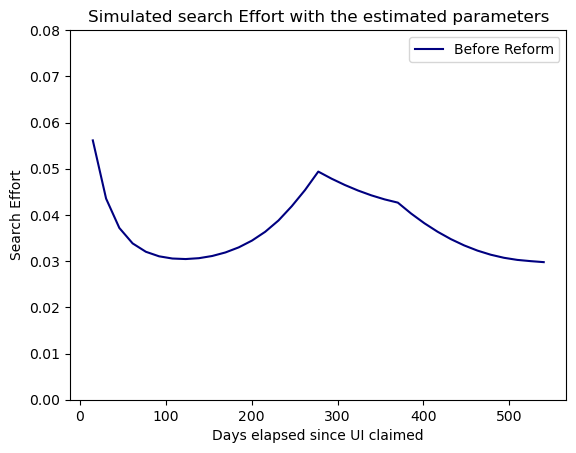

In [4]:
sim = sim_search_effort_HTM(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot((time+1)*15, sim, color='navy', label='Before Reform') 
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')
plt.title('Simulated search Effort with the estimated parameters')
plt.ylim(0.0, 0.08)
plt.legend()
plt.show()

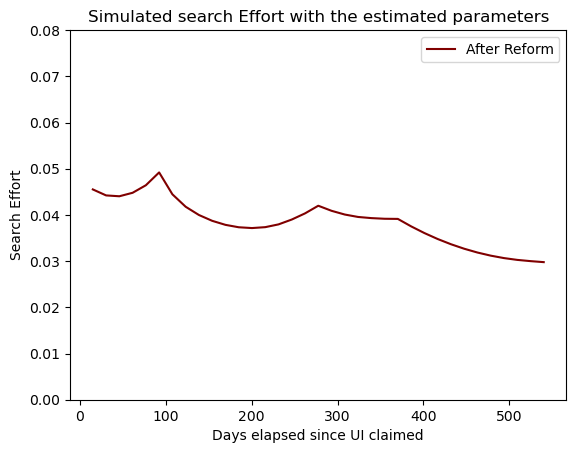

In [5]:
model.par.b1 = 342.0/675.0      # Value after reform
model.par.b2 = 171.0/675.0      # Value after reform

model.allocate()
s_forecast = model.solve_HTM()

true_data_outofsample = model.data.moments_after
true_data_insample = model.data.moments_before
mse_eta1_outofsample = np.mean((true_data_outofsample - s_forecast)**2)
mse_eta1_insample = np.mean((true_data_insample - sim)**2)

# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot((time+1)*15, s_forecast, label='After Reform', color='maroon')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')
plt.title('Simulated search Effort with the estimated parameters')
plt.legend()
plt.ylim(0.0, 0.08)
plt.show()

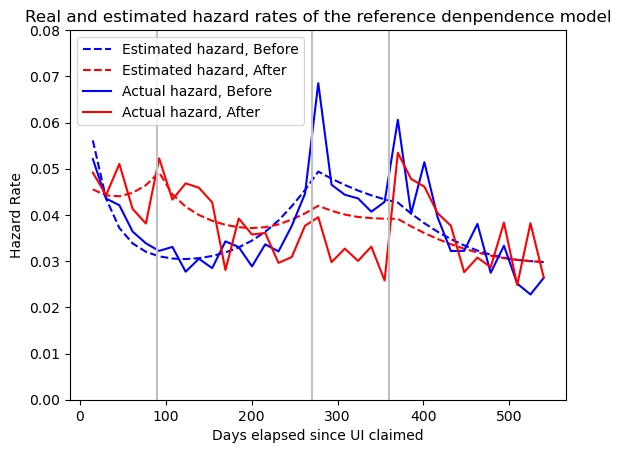

In [6]:
#Replicating figure 7(b) from the paper
after = model_new.data.moments_after
before = model_new.data.moments_before

time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot((time+1)*15, sim, color='Blue', label='Estimated hazard, Before', linestyle='--')
plt.plot((time+1)*15, s_forecast, label='Estimated hazard, After', color='Red', linestyle='--')
plt.plot((time+1)*15, before, label='Actual hazard, Before', color='Blue')
plt.plot((time+1)*15, after, label='Actual hazard, After', color='Red')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Hazard Rate')
plt.title('Real and estimated hazard rates of the reference denpendence model')
plt.axvline(x=90, color='silver')
plt.axvline(x=270, color='silver')
plt.axvline(x=360, color='silver')
plt.legend()
plt.ylim(0.0, 0.08)
plt.show()

# Model with **NO** reference dependence (standard model)

In [7]:
# model_new = deepcopy(model)

model_new.par.eta = 0.0     # Removes reference dependence
# model_new.par.full_sample_estimation = True
model_new.allocate()

est_par = ['gamma', 'cost1', 'cost2', 'cost3', 'type_shares1', 'type_shares3', 'Welfare'] # Parameters to estimate
theta0 = [0.9, 84, 242, 310, 0.4, 0, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, model_new.par.cost2), (model_new.par.cost1,model_new.par.cost3), (model_new.par.cost2,700.0), (0,1), (0,1), (0,model.par.b3)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds,weight=False)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')

c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\hand_to_mouth.py:65: RuntimeWarning: invalid value encountered in scalar multiply
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])


Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.071
cost1                    84.676
cost2                   341.550
cost3                   310.000
type_shares1              0.216
type_shares3              0.000
Welfare                   0.100
Objective:               0.4439
Number of iterations:    27


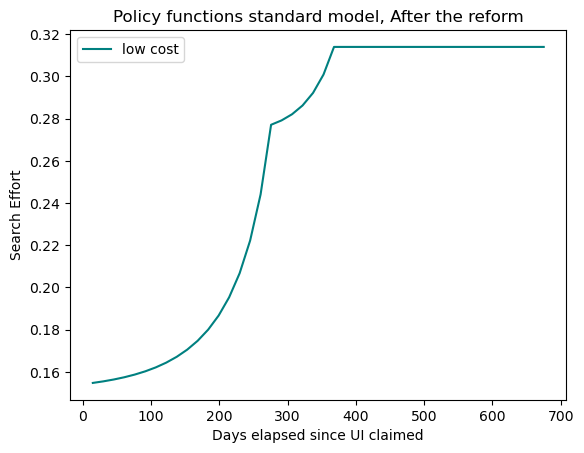

In [8]:
search_effort_new = solve_search_effort_HTM(model_new.par)
time = np.linspace(0, model_new.par.T, model_new.par.T)
plt.plot((time+1)*15, search_effort_new[0,:], label = 'low cost', color='teal') 
# plt.plot((time+1)*15, search_effort_new[1,:], label = 'medium cost', color='orange') 
# plt.plot((time+1)*15, search_effort_new[2,:], label = 'high', color='brown' ) 
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')
plt.title('Policy functions standard model, After the reform')
plt.legend()
plt.show()

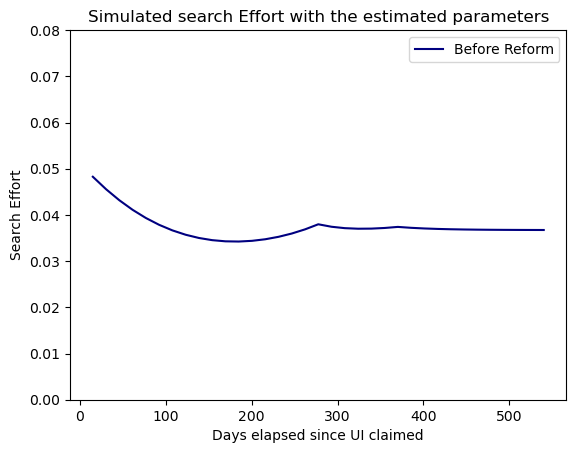

In [9]:
sim_new = sim_search_effort_HTM(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot((time+1)*15, sim_new, label='Before Reform', color='navy') 
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')
plt.title('Simulated search Effort with the estimated parameters')
plt.legend()
plt.ylim(0.0, 0.08)
plt.show()


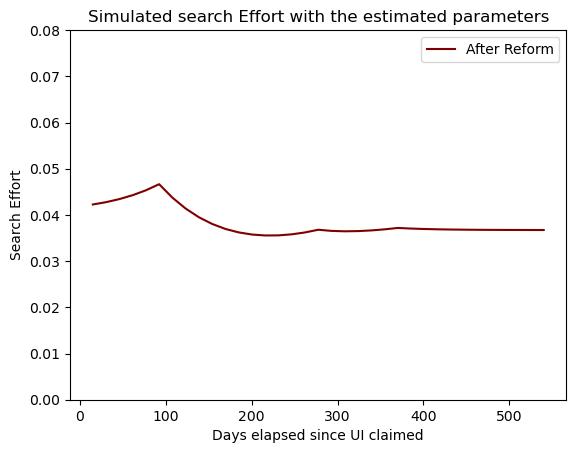

In [10]:
model_new.par.b1 = 342.0/675.0      # Value after reform
model_new.par.b2 = 171.0/675.0      # Value after reform

model_new.allocate()
s_forecast_new = model_new.solve_HTM()


# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot((time+1)*15, s_forecast_new, label='After Reform', color='maroon')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')
plt.title('Simulated search Effort with the estimated parameters')
plt.legend()
plt.ylim(0.0, 0.08)
plt.show()

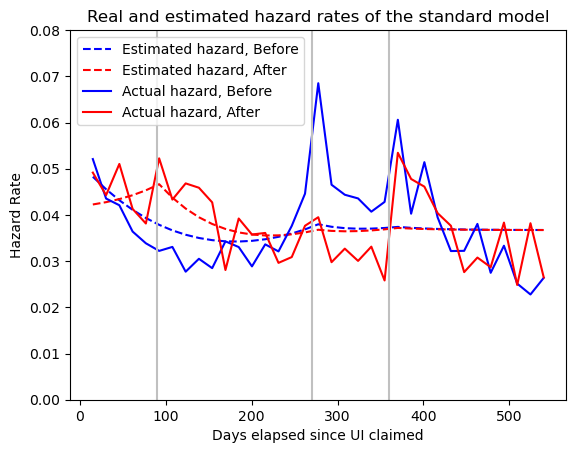

In [11]:
#Replicating figure 7(a) from the paper

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot((time+1)*15, sim_new, color='Blue', label='Estimated hazard, Before', linestyle='--')
plt.plot((time+1)*15, s_forecast_new, label='Estimated hazard, After', color='Red', linestyle='--')
plt.plot((time+1)*15, before, label='Actual hazard, Before', color='Blue')
plt.plot((time+1)*15, after, label='Actual hazard, After', color='Red')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Hazard Rate')
plt.title('Real and estimated hazard rates of the standard model')
plt.axvline(x=90, color='silver')
plt.axvline(x=270, color='silver')
plt.axvline(x=360, color='silver')
plt.legend()
plt.ylim(0.0, 0.08)
plt.show()

# **Comparison of the standard model and reference dependence**
### Through the Mean Square Error

In [12]:
true_data_outofsample = model_new.data.moments_after
true_data_insample = model_new.data.moments_before

# Get the mean square errors
mse_eta0_outofsample = np.mean((true_data_outofsample - s_forecast_new)**2)
mse_eta0_insample = np.mean((true_data_insample - sim_new)**2)

# Comparison out of sample
comparison1 = "smaller" if mse_eta1_outofsample < mse_eta0_outofsample else "bigger" if mse_eta1_outofsample > mse_eta0_outofsample else "equal"
comparison2 = "WITH reference dependence" if mse_eta1_outofsample < mse_eta0_outofsample else "WITHOUT reference dependence" 

# Comparison in sample
comparison3 = "smaller" if mse_eta1_insample < mse_eta0_insample else "bigger" if mse_eta1_insample > mse_eta0_insample else "equal"
comparison4 = "WITH reference dependence" if mse_eta1_insample < mse_eta0_insample else "WITHOUT reference dependence"


print("Before the reform: ")
print("-" * 100)
print(f"The mean square error from the model \033[1mwith\033[0m reference dependence is {mse_eta1_insample}")
print(f"The mean square error from the model \033[1mwithout\033[0m reference dependence is {mse_eta0_insample}")
print(f"The mean square error for the model \033[1mwith\033[0m reference dependence is \033[1m{comparison3}\033[0m than the model without.")
print(f"Best model: \033[1m{comparison4}\033[0m.")
print("-" * 100)



print("After the reform:")
print("-" * 100)
print(f"The mean square error from the model \033[1mwith\033[0m reference dependence is {mse_eta1_outofsample}")
print(f"The mean square error from the model \033[1mwithout\033[0m reference dependence is {mse_eta0_outofsample}")
print(f"The mean square error for the model \033[1mwith\033[0m reference dependence is \033[1m{comparison1}\033[0m than the model without.")
print(f"Best model: \033[1m{comparison2}\033[0m.")
print("-" * 100)

Before the reform: 
----------------------------------------------------------------------------------------------------
The mean square error from the model with reference dependence is 0.00014119763280000304
The mean square error from the model without reference dependence is 0.00010373701321620852
The mean square error for the model with reference dependence is bigger than the model without.
Best model: WITHOUT reference dependence.
----------------------------------------------------------------------------------------------------
After the reform:
----------------------------------------------------------------------------------------------------
The mean square error from the model with reference dependence is 8.956306281315922e-05
The mean square error from the model without reference dependence is 7.4452692684137e-05
The mean square error for the model with reference dependence is bigger than the model without.
Best model: WITHOUT reference dependence.
-------------------------

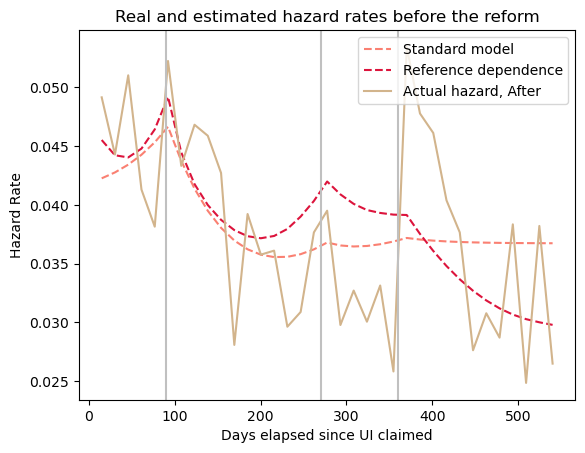

In [13]:
after = model_new.data.moments_after

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)     # x-axis
plt.plot((time+1)*15, s_forecast_new, label='Standard model', color='salmon', linestyle='--')                     # Model with no reference dependence
plt.plot((time+1)*15, s_forecast, label='Reference dependence', color='crimson', linestyle='--')                         # Model with reference dependence
plt.plot((time+1)*15, after, label='Actual hazard, After', color='tan')                        # True data
# Make a vertical line at 90, 270 and 360
plt.axvline(x=90, color='silver')
plt.axvline(x=270, color='silver')
plt.axvline(x=360, color='silver')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Hazard Rate')
plt.legend()
plt.title('Real and estimated hazard rates before the reform')
plt.show()

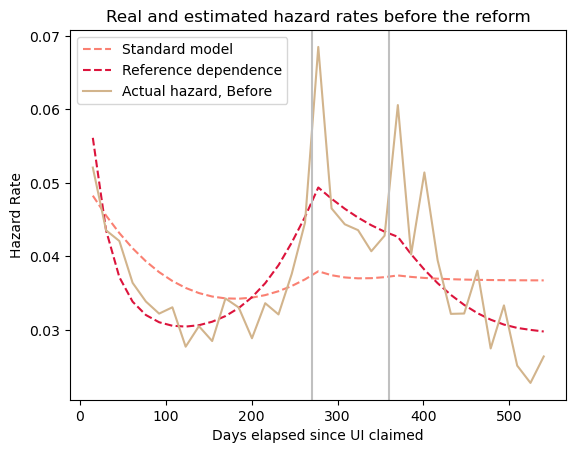

In [14]:
before = model_new.data.moments_before

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)     # x-axis
plt.plot((time+1)*15, sim_new, label='Standard model', color='salmon', linestyle='--')                            # Model with no reference dependence
plt.plot((time+1)*15, sim, label='Reference dependence', color='crimson', linestyle='--')                                # Model with reference dependence
plt.plot((time+1)*15, before, label='Actual hazard, Before', color='tan')                           # True data
plt.axvline(x=270, color='silver')
plt.axvline(x=360, color='silver')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Hazard Rate')
plt.legend()
plt.title('Real and estimated hazard rates before the reform')
plt.show()